# Laboratorio 7: Clasificaci√≥n ü§ó

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebasti√°n Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicol√°s Ojeda, Melanie Pe√±a, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Nicolas Herrera
- Nombre de alumno 2: Lucas Carrasco

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/vspartamo/MDS7202)

### Temas a tratar
- Clasificaci√≥n en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- C√≥digo que no se pueda ejecutar, no ser√° revisado.



### Objetivos principales del laboratorio
- Comprender c√≥mo trabajar con problemas de clasificaci√≥n con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Te√≥rica [12 puntos]




1. Explique cu√°l es la diferencia entre los datos de entrenamiento y validaci√≥n. [1 punto]

2. Explique cu√°l es el principal desaf√≠o al trabajar problemas de clasificaci√≥n con data no supervisada. [1 punto]

3. Explique en **sus palabras** qu√© es la matriz de confusi√≥n y para qu√© se utiliza. [1 puntos]

4. Escriba la f√≥rmula de las siguientes m√©tricas y explique con **sus palabras** c√≥mo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qu√© m√©trica recomendar√≠a para los siguientes contextos de clasificaci√≥n. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detecci√≥n de enfermedades altamente contagiosas.
  * Aprobaci√≥n de cr√©ditos de alto riesgo.
  * Detecci√≥n de cr√≠menes.

6. Explique qu√© es la calibraci√≥n de modelos y para qu√© se usa. [1 punto]


**Respuesta:**

1. - *Datos de entrenamiento*: son los datos utilizados para entrenar un modelo de donde este aprende sus patrones subyacentes para predecir alguna etiquita o valor.
   - *Datos de validaci√≥n*: Son datos que se emplean para evaluar el rendimiento del modelo mientras se ajustan los hiperpar√°metros, por este motivo deben ser necesariamente diferentes a los datos de entrenamiento, de modo que ayuden a prevenir el sobreajuste y asegurar que el modelo generalice bien.


2. El principal desaf√≠o es la ausencia de etiquetas o categor√≠as predefinida, de modo que los algoritmos deben aprender o estimar la clasifiaci√≥n de los datos, no siendo siempre las esperadas. 

3. La matriz de confusi√≥n es una tabla que permite visualizar el rendimiento de un modelo de clasificaci√≥n mostrando las predicciones correctas e incorrectas en    cada  clase. Tiene cuatro componentes principales:
   - *Verdaderos positivos (TP)*: Casos correctamente clasificados como positivos.
   - *Falsos positivos (FP)*: Casos incorrectamente clasificados como positivos.
   - *Verdaderos negativos (TN)*: Casos correctamente clasificados como negativos.
   - *Falsos negativos (FN)*: Casos incorrectamente clasificados como negativos.
   Se utiliza para calcular m√©tricas como precisi√≥n, recall y accuracy.


4. F√≥rmulas:
A partir de la notaci√≥n anterior tenemos que, 
   - *Accuracy*:
     $
     \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
     $
     Es la proporci√≥n de predicciones correctas sobre el total de predicciones, midiendo que tan bien etiqueta a la clase positiva en relaci√≥n con todas las predicciones hechas
   
   - *Precision*:
     $
     \text{Precision} = \frac{TP}{TP + FP}
     $
     Indica qu√© proporci√≥n de las predicciones positivas son correctas, es decir, la propori√≥n de veces en que acert√≥ en la clase positiva en relaci√≥n a los que les dio esa etiqueta, es importante cuando los falsos positivos son problematicos.

   - *Recall*:
     $
     \text{Recall} = \frac{TP}{TP + FN}
     $
     Mide qu√© proporci√≥n de los verdaderos positivos fueron identificados correctamente por el modelo, es relevante cuando los falsos negativos deben minimizarse.

   - *F1 Score*:
     $
     F1 =  \frac{1}{\frac{1}{Precision} + \frac{1}{Recall}}
     $
     Es la media arm√≥nica entre precisi√≥n y recall, se utiliza cuando se necesita un equilibrio entre ambos.

5. 1) *Recall*: porque en este contexto un falso positivo es m√°s grave, que corresponde a cuando la m√°quina falla y dijimos que no ser√≠a as√≠, en cambio no es tan terrible decir que fallar√° y esta no lo haga.
   2) *Recall*: el motivo es muy similar al anterior, ya que conviene m√°s comunicar que s√≠ se posee la enfermedad no teni√©ndola antes que el caso contrario, con lo que se disminuye la propagaci√≥n de la enfermedad.
   3) *Precision*. Es importante minimizar los falsos positivos, ya que conceder cr√©dito a personas no re√∫nen los requisitos es m√°s problem√°tico al banco que el caso contrario.
   4) *Precision*: porque maximizar esta m√©trica equivale a reducir los casos en que se acusa erroneamente a una persona inocente

6. *Calibraci√≥n de modelos*:
   La calibraci√≥n de modelos es el proceso mediante el cual se ajustan las probabilidades de predicci√≥n del modelo para que reflejen con mayor fineza las probabilidades reales de los eventos. Se usa para asegurar que las probabilidades predichas sean m√°s cercanas a la realidad y mejorar la interpretaci√≥n del modelo en t√©rminos probabil√≠sticos. Es especialmente √∫til cuando se necesita que las predicciones probabil√≠sticas sean confiables, como en modelos de toma de decisiones.

# Parte pr√°ctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el tr√°gico despido de la m√≠tica mascota de Maip√∫, Renac√≠n decide adentrarse como consultor en el mercado futbolero, el cu√°l (para variar...) est√° cargado en especulaciones.

Como su principal tarea ser√° asesorar a los directivos de los clubes sobre cu√°l jugador comprar y cu√°l no, Renac√≠n desea generar modelos predictivos que evalu√©n distintas caracter√≠sticas de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condici√≥n de corporeo le impidi√≥ tomar la versi√≥n anterior de MDS7202, por lo que este motivo Renac√≠n contrata a su equipo para lograr su objetivo final. Dado que a√∫n tiene fuertes v√≠nculos con la direcci√≥n de deportes de la municipalidad, el corporeo le entrega base de datos con las estad√≠sticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deber√°n trabajar con el csv `statsplayers.csv`, donde deber√°n aplicar algoritmos de aprendizaje supervisado de clasificaci√≥n en base a caracter√≠sticas que describen de jugadores de f√∫tbol.

Para comenzar cargue el dataset se√±alado y a continuaci√≥n vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las caracter√≠sticas principales del `DataFrame`.

In [310]:
# Si usted est√° utilizando Colabolatory le puede ser √∫til este c√≥digo para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Direcci√≥n donde tiene los archivos en el Drive'
except:
    print('Ignorando conexi√≥n drive-colab')

Ignorando conexi√≥n drive-colab


In [311]:
import pandas as pd
import numpy as np

# Cargamos los datos
data = pd.read_csv('stats_players.csv')
data.head()

Name Nationality National_Position Club_Position  Height  \
0  Cristiano Ronaldo    Portugal                LS            LW     185   
1       Lionel Messi   Argentina                RW            RW     170   
2             Neymar      Brazil                LW            LW     174   
3        Luis Su√°rez     Uruguay                LS            ST     182   
4       Manuel Neuer     Germany                GK            GK     193   

   Weight Preffered_Foot  Age        Work_Rate  Weak_foot  ...  Agility  \
0      80          Right   32       High / Low          4  ...       90   
1      72           Left   29  Medium / Medium          4  ...       90   
2      68          Right   25    High / Medium          5  ...       96   
3      85          Right   30    High / Medium          4  ...       86   
4      92          Right   31  Medium / Medium          4  ...       52   

   Jumping  Heading  Shot_Power  Finishing  Long_Shots  Curve  \
0       95       85          92         93          90     81   
1       68       71          85         95          88     89   
2       61       62          78         89          77     79   
3       69       77          87         94          86     86   
4       78       25          25         13          16     14   

   Freekick_Accuracy  Penalties  Volleys  
0                 76         85       88  
1                 90         74       85  
2                 84         81       83  
3                 84         85       88  
4                 11         47       11  

[5 rows x 39 columns]

## 1. Predicci√≥n de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificaci√≥n binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su pa√≠s. [Sin puntaje]

2. Hecho esto, ¬øcu√°ntos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y gu√°rdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [312]:
labels = data['National_Position'].apply(lambda x: 0 if pd.isna(x) else 1)
labels.value_counts()

National_Position
0    16513
1     1075
Name: count, dtype: int64

Se tiene un desequilibrio entre los positivos y negativos, lo que quiere decir que la gran mayor√≠a de jugadores no son seleccionados nacionales, de modo que se debe tener en cuenta el desbalance de clases al entrenar y/o evaluar modelos predictivos de esto, porque el accuracy ser√° una m√©trica que muy probablemente sea alta mientras que Precision no.

In [313]:
categ_cols = [
    'Name',
    'Nationality',
    'National_Position',
    'Club_Position',
    'Preffered_Foot',
    'Work_Rate',
    'Weak_foot',
    'Skill_Moves'
]

num_cols = data.columns.difference(categ_cols)

assert len(categ_cols) == 8
assert len(num_cols) == 31

In [314]:
for col in categ_cols:
    data[col] = data[col].astype('category')

Revisando el archivo `Player_Stats_Report.html` se da cuenta de que las siguientes transformaciones son necesarias:
1. Eliminar las columnas `Name` y `National_Position`, ya que la primera es solo un identificador y la segunda posee demasiados valores nulos.
2. Para las variables categoricas es necesario primero imputar los valores nulos (hay solo 1 en una columna) y luego aplicar un OneHotEncoder para poder trabajar con ellas.
3. Para las variables num√©ricas es necesario aplicar un escalador (MinMaxScaler) para que todas las variables tengan la misma escala.

In [315]:
data = data.drop(columns=['Name', 'National_Position'])
categ_cols_not_dropped = [col for col in categ_cols if col not in ['Name', 'National_Position']]

In [316]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

categ_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoding', OneHotEncoder(sparse_output = False, handle_unknown='infrequent_if_exist'))
    ]
)

num_pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler())
    ]
)

col_transformer = ColumnTransformer(
    [
        ('categ_pipeline', categ_pipeline, categ_cols_not_dropped),
        ('num_pipeline', num_pipeline, num_cols)
    ]
)

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporci√≥n queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribuci√≥n original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentaci√≥n de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la secci√≥n de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=19, stratify=labels)

pipeline_xgboost = Pipeline(
    [
        ('preprocessor', col_transformer),
        ('classifier', XGBClassifier())
    ]
)

pipeline_lightgbm = Pipeline(
    [
        ('preprocessor', col_transformer),
        ('classifier', LGBMClassifier())
    ]
)

In [318]:
pipeline_xgboost.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categ_pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent')),
                                                                  ('one_hot_...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

In [319]:
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 752, number of negative: 11559
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2648
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 146
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061084 -> initscore=-2.732483
[LightGBM] [Info] Start training from score -2.732483


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categ_pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent')),
                                                                  ('one_hot_...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las m√©tricas accuracy, precisi√≥n y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qu√© implican los valores de accuracy, precisi√≥n y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y c√≥mo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qu√© m√©trica le parece m√°s adecuada y concluya qu√© modelo tiene un mejor desempe√±o. [2 puntos]

**Respuesta:**

In [320]:
# Calculamos a mano la accuracy, precision, recall de la clase 1
preds_xgboost = pipeline_xgboost.predict(X_test)
preds_lightgbm = pipeline_lightgbm.predict(X_test)

def calculate_metrics(preds, y_test):
    true_positive = ((preds == 1) & (y_test == 1)).sum()
    false_positive = ((preds == 1) & (y_test == 0)).sum()
    false_negative = ((preds == 0) & (y_test == 1)).sum()
    true_negative = ((preds == 0) & (y_test == 0)).sum()

    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)

    return accuracy, precision, recall

accuracy_xgboost, precision_xgboost, recall_xgboost = calculate_metrics(preds_xgboost, y_test)
accuracy_lightgbm, precision_lightgbm, recall_lightgbm = calculate_metrics(preds_lightgbm, y_test)

print(f'XGBoost: Accuracy: {accuracy_xgboost}, Precision: {precision_xgboost}, Recall: {recall_xgboost}')
print(f'LightGBM: Accuracy: {accuracy_lightgbm}, Precision: {precision_lightgbm}, Recall: {recall_lightgbm}')

XGBoost: Accuracy: 0.9476975554292212, Precision: 0.6459627329192547, Recall: 0.3219814241486068
LightGBM: Accuracy: 0.9514875876444949, Precision: 0.7375886524822695, Recall: 0.3219814241486068


In [321]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds_xgboost))

print(classification_report(y_test, preds_lightgbm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.65      0.32      0.43       323

    accuracy                           0.95      5277
   macro avg       0.80      0.66      0.70      5277
weighted avg       0.94      0.95      0.94      5277

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.74      0.32      0.45       323

    accuracy                           0.95      5277
   macro avg       0.85      0.66      0.71      5277
weighted avg       0.94      0.95      0.94      5277



El accuracy es que porcentaje de todas las predicciones fueron correctas, pero comola clase $1$  que representa a los jugadores que son seleccionados nacionales es minoritaria, el accuracy no es es tan √∫til porque si tuvieramos un modelo que siempre predijera $0$ tendr√≠a una alto accuracy, fallando la mayor√≠a de casos en que se predice a los seleccionados, por su parte la precisi√≥n indica qu√© tan confiables son las predicciones positivas, por lo q un valor alto de precisi√≥n sugiere que pocos jugadores fueron incorrectamente clasificados como seleccionados cuando no lo eran (bajo n√∫mero de falsos positivos), que es lo m√°s acertado en nuestro caso, por √∫ltimo, el recall eval√∫a cu√°ntos de los jugadores realmente seleccionados fueron identificados por el modelo, si el recall es bajo, significa que el modelo est√° perdiendo muchos jugadores que en realidad fueron seleccionados (es decir, tiene muchos falsos negativos). Con ello, tenemos que el desbalance de clases influye fuertemente en qu√© m√©trica queremos usar para mejorar el desempe√±o factual de los modelos.

Por lo dicho anteriormente, tenemos que queremos maximizar precision y recall simultaneamente, con ello, queremos maximizar F1, que es la media arm√≥nica entre ambas m√©tricas, por lo que ambos modelos son igual de buenos, pero el mejor desempe√±o en precision hace elegir LightGBM.

## 2. Predicci√≥n de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renac√≠n escuch√≥ a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posici√≥n en la cancha en la que juega. Y adem√°s, que hay bastantes jugadores nuevos que no tienen muy claro en que posici√≥n verdaderamente brillar√≠an, por lo que actualmente puede que actualmente est√©n jugando en posiciones sub-optimas.

Viendo que los resultados del primer an√°lisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posici√≥n de los jugadores en la cancha seg√∫n sus caracter√≠sticas.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renac√≠n les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elecci√≥n del clasificador se justificar en base a la siguiente [gu√≠a](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificaci√≥n.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores se√±alados en esta secci√≥n y gu√°rdelos en la variable `label`.
2. Cuente cu√°ntos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluaci√≥n de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [322]:
data['Club_Position'].value_counts().head()

Club_Position
Sub    7492
Res    3146
RCB     633
GK      632
LCB     631
Name: count, dtype: int64

In [323]:
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
listed_positions = ataque + central_ataque + central + central_defensa + defensa + arquero
posible_positions = data['Club_Position'].unique()
positions_not_listed = [pos for pos in posible_positions if pos not in listed_positions]

In [324]:
data_clean_positions = data.copy()
data_clean_positions.dropna(subset=['Club_Position'], inplace=True)
for pos in positions_not_listed:
    data_clean_positions = data_clean_positions[data_clean_positions['Club_Position'] != pos]
data_clean_positions['Club_Position'] = data_clean_positions['Club_Position'].cat.remove_unused_categories()
data_clean_positions['Club_Position'].unique()

['LW', 'RW', 'ST', 'GK', 'CAM', ..., 'CB', 'CM', 'RWB', 'LWB', 'CF']
Length: 15
Categories (15, object): ['CAM', 'CB', 'CDM', 'CF', ..., 'RM', 'RW', 'RWB', 'ST']

In [325]:
dict_position = {
    'ataque': ataque,
    'central_ataque': central_ataque,
    'central': central,
    'central_defensa': central_defensa,
    'defensa': defensa,
    'arquero': arquero,
    'other': positions_not_listed
}

In [326]:
type_of_position = data_clean_positions['Club_Position'].apply(lambda x: [key for key, value in dict_position.items() if x in value][0])
type_of_position.value_counts()

Club_Position
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

In [327]:
data_clean_positions.head()

Nationality Club_Position  Height  Weight Preffered_Foot  Age  \
0    Portugal            LW     185      80          Right   32   
1   Argentina            RW     170      72           Left   29   
2      Brazil            LW     174      68          Right   25   
3     Uruguay            ST     182      85          Right   30   
4     Germany            GK     193      92          Right   31   

         Work_Rate Weak_foot Skill_Moves  Ball_Control  ...  Agility  Jumping  \
0       High / Low         4           5            93  ...       90       95   
1  Medium / Medium         4           4            95  ...       90       68   
2    High / Medium         5           5            95  ...       96       61   
3    High / Medium         4           4            91  ...       86       69   
4  Medium / Medium         4           1            48  ...       52       78   

   Heading  Shot_Power  Finishing  Long_Shots  Curve  Freekick_Accuracy  \
0       85          92         93          90     81                 76   
1       71          85         95          88     89                 90   
2       62          78         89          77     79                 84   
3       77          87         94          86     86                 84   
4       25          25         13          16     14                 11   

   Penalties  Volleys  
0         85       88  
1         74       85  
2         81       83  
3         85       88  
4         47       11  

[5 rows x 37 columns]

In [328]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(data_clean_positions, type_of_position, test_size=0.3, random_state=19, stratify=type_of_position)

pipeline_knn = Pipeline(
    [
        ('preprocessor', col_transformer),
        ('classifier', KNeighborsClassifier())
    ]
)

pipeline_knn.fit(X_train, y_train)

preds_knn = pipeline_knn.predict(X_test)

print(classification_report(y_test, preds_knn))

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.98      1.00      0.99       129
        central       0.95      0.97      0.96       272
 central_ataque       0.94      0.91      0.92       174
central_defensa       1.00      0.68      0.81        63
        defensa       0.95      0.99      0.97       354

       accuracy                           0.96      1182
      macro avg       0.97      0.93      0.94      1182
   weighted avg       0.96      0.96      0.96      1182



Al realizar esto los resultados son super buenos ya que esta agrupaci√≥n de posiciones hace que la cantidad de instancias para cada clase sea mucho m√°s equilibrada. De hecho la clase que posee un mayor desequilibrio es justamente la que tiene peores resultados (central_defensa). Esto puede ser una muy buena opci√≥n si alguien tiene este problema de desequilibrio y tiene conocimiento del problema suficiente para crear agrupaciones de clases donde el desbalanceo sea menor.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Despu√©s de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el f√∫tbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teor√≠a es que muchos artistas del g√©nero urbano chileno, con sus habilidades √∫nicas y su disciplina, podr√≠an destacarse tambi√©n en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino tambi√©n demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¬øQu√© modelo de √°rbol es m√°s de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la secci√≥n 1.1. Para determinar cu√°l modelo de √°rbol ser√≠a m√°s adecuado para la tarea en cuesti√≥n, utilice PyCaret. Este deber√° centrarse exclusivamente en modelos de tipo √°rbol. Jere ha especificado que busca un modelo que tome decisiones r√°pidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparaci√≥n, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparaci√≥n de modelos, seleccione aquel que muestre el mejor rendimiento en t√©rminos de velocidad y precisi√≥n, especialmente en la reducci√≥n de falsos positivos. Utilice la funci√≥n `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusi√≥n Matrix**: ¬øC√≥mo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¬øEs acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¬øCu√°les son las variables con mejor desempe√±o? ¬øA qu√© podr√≠a deberse esto?
  - **Learning Curve**: ¬øEl modelo presenta alg√∫n problema?

  [4 puntos]

**Respuesta**

In [329]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os
import numpy as np
import random

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"
np.random.seed(19)
random.seed(19)

# es necesario instalar las librerias:
# pip install xgboost lightgbm catboost
models_to_compare = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']

data_pycaret = data.copy()
data_pycaret['label'] = labels

#Continuar c√≥digo aqu√≠
clf = setup(data_pycaret, target='label', session_id=19, n_jobs=1)

In [330]:
best_model = clf.compare_models(include=models_to_compare, sort='Prec.')
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=1,
                     oob_score=False, random_state=19, verbose=0,
                     warm_start=False)

Dadas las m√©tricas que se desean priorizar, se obtiene que le **ExtraTreesClassifier** es el mejor, ya que este obtiene la mejor precision y un buen tiempo. En particular cabe destacar que despu√©s de correr varias veces compare_models, los tiempos varian, y el ranking va cambiando mucho entre los modelos, por lo que se puede esperar que no hay uno con una clara superioridad en tiempo, y su tiempo de predicci√≥n podr√≠a variar mucho dependiendo de la corrida.

In [331]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin‚Ä¶

- **Matriz de confusi√≥n**: La tasa de verdaderos negativos es muchisimo m√°s alta (4929 TN, 56 TP). Esto es esperable considerando que la clase negativa posee muchas m√°s instancias en el set de datos que usamos para entrenar, ya que con clases desbalanceadas los modelos tienden a predecir la clase mayoritaria. Este comportamiento se repara un poco al elegir el modelo que posea la mejor precision, ya que esto nos permitira reducir la cantidad de falsos positivos, y as√≠ **mejorar la tasa de verdaderos positivos**.
- **Threshold**: Al revisar las curvas creadas a partir del modelo, se observa que la mejor precision se obtiene para un threshold de 0.6, distinto al 0.5 que suele ser el default. En particular para un valor un poco mayor a 0.6 en el threshold, se obtendr√≠a una precision de 1, sin embargo, las m√©tricas f1 y recall bajar√≠an muy fuertemente por debajo del 0.2, y se mantendr√≠an muy cercanas al 0. Considerando esto, se puede jugar con el precision con valores entre 0.25 y 0.6, ya que en ese punto empiezan a disminuir las otras m√©tricas.
- **Feature importance**: La variable m√°s importante a la hora de tomar la decisi√≥n de la clase es de lejos **Nationality**. Esto tiene mucho sentido considerando que la variable objetivo corresponde a si el jugador es seleccionado nacional o no, ya que es en general ser√° mucho m√°s dif√≠cil formar parte de la selecci√≥n si el pa√≠s tiene jugadores de mucha calidad, y viceversa. Luego el resto de las variables m√°s importantes parecen estar relacionadas a las habilidades de los jugadores en la cancha, lo que es importante para seleccionar o no a un jugador para la selecci√≥n nacional.
- **Learning curve**: Se observa que al aumentar la cantidad de ejemplos en el set de entrenamiento la precision no cambia significativamente, aunque, cabe destacar que alrededor d elos 7600 ejemplos, la precision empieza a disminuir momentaneamente, para luego volver a subir. Esto podr√≠a deberse a que el modelo empieza a sobreajustar, y luego corrige un poco.

### 2.2 Reducci√≥n de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Adem√°s, se debe proceder a realizar una reducci√≥n de dimensionalidad basada en la importancia de las caracter√≠sticas.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las caracter√≠sticas disponibles. [2 puntos]

2. Una vez el modelo est√© entrenado, eval√∫e y clasifique las caracter√≠sticas seg√∫n su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificaci√≥n para ejecutar una b√∫squeda recursiva de eliminaci√≥n de caracter√≠sticas, eliminando progresivamente las menos importantes y evaluando el impacto en el desempe√±o del modelo hasta identificar las N caracter√≠sticas m√°s cr√≠ticas. [2 puntos]

4. Con este conjunto reducido de caracter√≠sticas, entrene un nuevo modelo y eval√∫e su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensi√≥n m√°s profunda de los cambios y beneficios:

  - ¬øEl rendimiento del modelo con las caracter√≠sticas seleccionadas es similar al del modelo original? ¬øC√≥mo se comparan en t√©rminos de precisi√≥n y robustez? [2 puntos]
  - ¬øCu√°les son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificaci√≥n del modelo, reducci√≥n del tiempo de entrenamiento, y mejora en la capacidad de generalizaci√≥n. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es m√°s sencillo de explicar. Explique brevemente por qu√© la eliminaci√≥n de ciertas caracter√≠sticas puede facilitar la comprensi√≥n y la explicaci√≥n del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre n√∫mero de festures y desempe√±o. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar m√°s features a su modelo.

**Respuesta**

In [332]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=19, stratify=labels)

xgb = XGBClassifier(enable_categorical=True)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

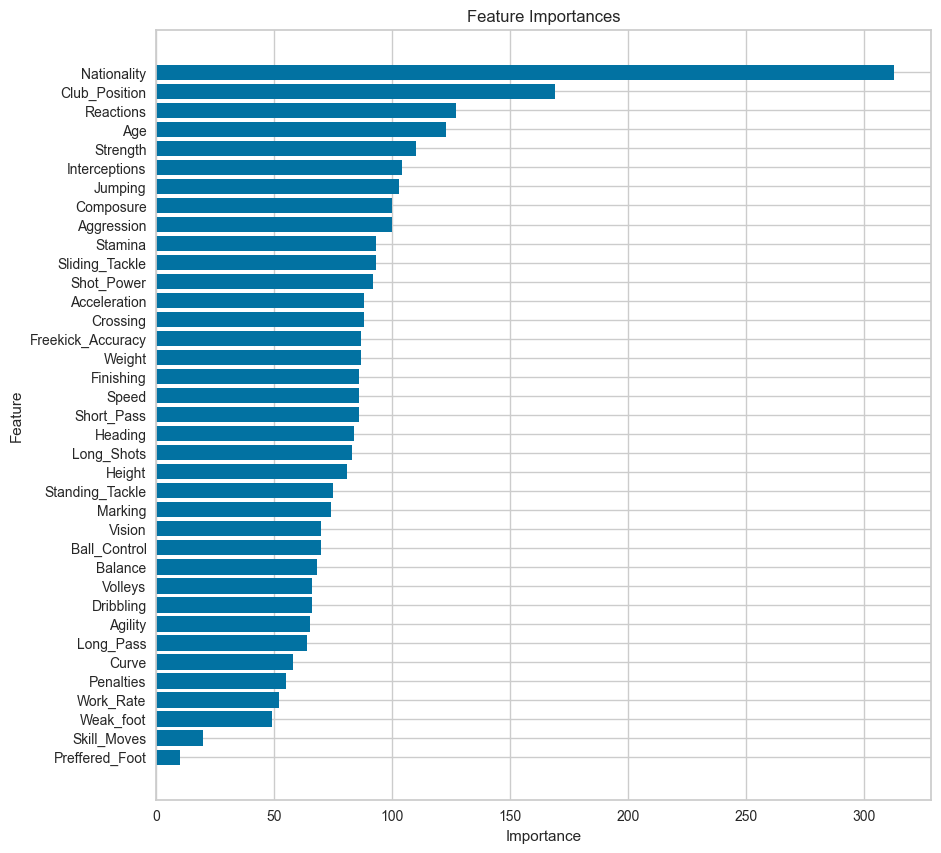

In [333]:
import matplotlib.pyplot as plt

def get_feature_importances(model, feature_names):
    importances = list(model.get_booster().get_score(importance_type='weight').values())
    features = feature_names
    features_and_importances = list(zip(features, importances))
    features_and_importances.sort(key=lambda x: x[1])
    features_ordered = [x[0] for x in features_and_importances]
    importances = [x[1] for x in features_and_importances]

    return features_ordered, importances

features_ordered, importances = get_feature_importances(xgb, data.columns)

plt.figure(figsize=(10, 10))
plt.barh(features_ordered, importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [334]:
N_features = 10

accuracies = []
precisions = []
recalls = []
number_of_features = []

features_ordered, importances = get_feature_importances(xgb, data.columns)

data_feature_extraction = data.copy()

while data_feature_extraction.shape[1] >= N_features:
    number_of_features.append(data_feature_extraction.shape[1])
    print(f'Number of features: {data_feature_extraction.shape[1]}')
    
    X_train, X_test, y_train, y_test = train_test_split(data_feature_extraction, labels, test_size=0.3, random_state=19, stratify=labels)
    
    tmp_xgb = XGBClassifier(enable_categorical=True)
    tmp_xgb.fit(X_train, y_train)
    
    # Evaluamos el modelo
    preds = tmp_xgb.predict(X_test)
    accuracy, precision, recall = calculate_metrics(preds, y_test)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')
    
    data_feature_extraction.drop(columns=[features_ordered[0]], inplace=True)
    features_removed = features_ordered[0]
    features_ordered = features_ordered[1:]
    print('')
    print(f'Feature removed: {features_removed}')

Number of features: 37
Accuracy: 0.9550881182490051, Precision: 0.6990740740740741, Recall: 0.4674922600619195

Feature removed: Preffered_Foot
Number of features: 36
Accuracy: 0.9524350956983134, Precision: 0.6621621621621622, Recall: 0.4551083591331269

Feature removed: Skill_Moves
Number of features: 35
Accuracy: 0.9547091150274777, Precision: 0.6842105263157895, Recall: 0.48297213622291024

Feature removed: Weak_foot
Number of features: 34
Accuracy: 0.9537616069736593, Precision: 0.680365296803653, Recall: 0.4613003095975232

Feature removed: Work_Rate
Number of features: 33
Accuracy: 0.9533826037521319, Precision: 0.6681222707423581, Recall: 0.47368421052631576

Feature removed: Penalties
Number of features: 32
Accuracy: 0.9543301118059504, Precision: 0.6814159292035398, Recall: 0.47678018575851394

Feature removed: Curve
Number of features: 31
Accuracy: 0.9548986166382414, Precision: 0.6940639269406392, Recall: 0.47058823529411764

Feature removed: Long_Pass
Number of features: 3

1. El rendimiento del modelo bastante al ir extrayendo caracter√≠sticas. En particular se observa que el rendimiento tanto para la precision como para el recall disminuyen al quitar las √∫ltimas pocas features que van quedando. Sin embargo, al llegar a la √∫ltima feature restante esto sube en precision, pero cae muy fuertemenete en recall, lo que es un trade off com√∫n entre las 2 m√©tricas, y puede deberse a que la **nacionalidad** podr√≠a dar una mejor forma para determinar si un jugador va a ser seleccionado o no.

2. Al reducir la cantidad de features lo primero y m√°s directo es que el modelo tanto para entrenar como para inferencia va a necesitar procesar una cantidad menor de datos, por lo que la complejidad de computo disminuye, y as√≠ es m√°s r√°pido en ambos procesos. Lo segundo es que al disminuir la cantidad de columnas se logra evitar la maldici√≥n de la alta dimensionalidad, lo que puede llevar a un mejor desempe√±o del modelo en general. Adem√°s, en t√©rminos de generalizaci√≥n, al tener menos features, el modelo podr√≠a ser m√°s robusto y generalizar mejor a datos nuevos.

3. Tener menos features contribuye mucho en la explicabilidad de las decisiones de un modelo, ya que el tener una cantidad de features baja permite tomar el modelo, y explicar variable a variable porque en un caso en particular se tomo una decisi√≥n u otra.

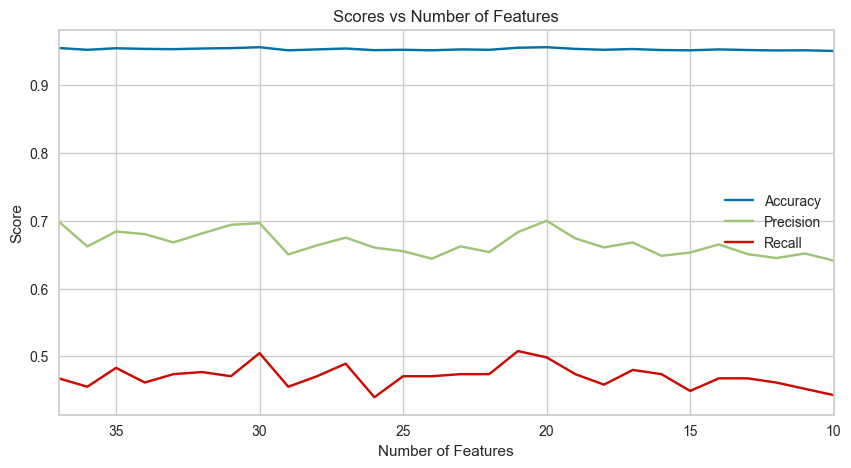

In [335]:
# plot results
fig = plt.figure(figsize=(10, 5))
plt.plot(number_of_features, accuracies, label='Accuracy')
plt.plot(number_of_features, precisions, label='Precision')
plt.plot(number_of_features, recalls, label='Recall')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.xlim(max(number_of_features), min(number_of_features))
plt.title('Scores vs Number of Features')
plt.show()

### 2.3 Calibraci√≥n Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos m√°s modulares, se recomienda realizar una calibraci√≥n del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un m√©todo de calibraci√≥n que asegure que las probabilidades generadas incrementen de manera mon√≥tona. Una m√©trica ampliamente utilizada para evaluar la precisi√≥n de la calibraci√≥n de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como despu√©s de la calibraci√≥n. Esto le permitir√° realizar una comparaci√≥n cuantitativa y determinar si la calibraci√≥n ha mejorado el rendimiento del modelo. Para m√°s informaci√≥n sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibraci√≥n, examine y comente los resultados obtenidos. A su an√°lisis a√±ada una comparaci√≥n visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [336]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=19, stratify=labels)
xgb = XGBClassifier(enable_categorical=True)
xgb.fit(X_train, y_train)

calibrated = CalibratedClassifierCV(xgb, method='isotonic', cv=3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=19)

estimator = cross_validate(
    calibrated, 
    X_test, 
    y_test, 
    cv=cv, 
    scoring='precision', 
    n_jobs=-1, 
    return_estimator=True
)

Brier score loss before calibration: 0.03620679688678315
Brier score loss after calibration: 0.015040184248884978


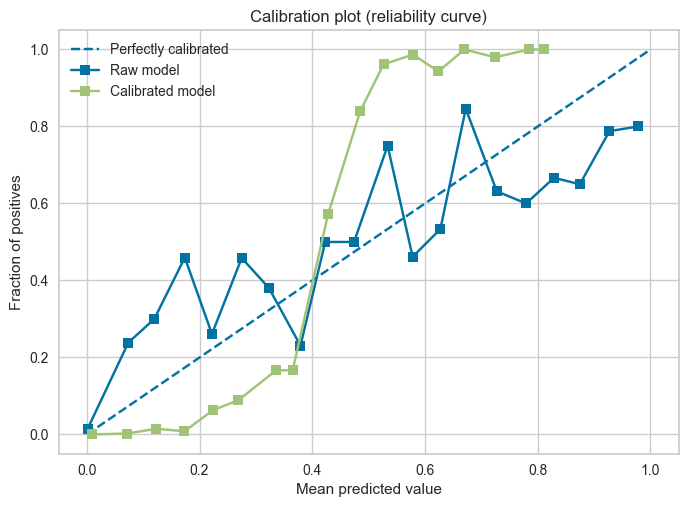

In [337]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

# Graficamos el primer modelo raw
prob_pos = xgb.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=20)
brier_before = brier_score_loss(y_test, prob_pos)
ax.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ('Raw model'))

# Graficamos el modelo calibrado
prob_pos = estimator['estimator'][0].predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=20)
brier_after = brier_score_loss(y_test, prob_pos)
ax.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ('Calibrated model'))

ax.legend()
print(f'Brier score loss before calibration: {brier_before}')
print(f'Brier score loss after calibration: {brier_after}')
plt.show()


Se observa que aplicar la calibraci√≥n de probabilidades mejora los resultados del modelo, as√≠ aproximandose a la curva esperada. Si bien tiene resultados considerables, donde el acercamiento a la curva es claro, y donde la funci√≥n de Brier Score es menor, se observa que el modelo calibrado no es perfecto, y que a√∫n se puede mejorar. En particular, se observa que el modelo calibrado tiene un comportamiento m√°s estable y m√°s f√°cil de comprender. Se observa que la curva tiende a cargarse a las puntas, para as√≠ luego tender a la curva ideal, lo que podr√≠a deberse a que el modelo calibrado tiende a ser m√°s extremo en sus predicciones, y luego se corrige.